In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar dataset
df = pd.read_csv("./Transformados/Dataset_clustering.csv", sep = ';')
df.head()

,Provincia,Trimestre,Anio,homicidios_consumados,drogas,homicidios_tentativa,lesiones,secuestro,sexual_agresion,sexual_otros,...,Desigualdad_p80p20,Soc_num_sociedades_sa,Soc_desmboldo_sociedades_sa,Soc_num_sociedades_sl,Soc_desembolso_sociedades_sl,Soc_num_sociedades_total,Soc_desembolso_sociedades_total,Paro_tasa_actividad,Paro_tasa_paro,Paro_tasa_empleo
0,Albacete,1,2017,0,15,1,28,0,0,11,...,2.8,2,120,597,21072,599,21192,57.42,24.48,43.36
1,Albacete,1,2018,1,12,0,24,0,3,22,...,2.7,2,215,611,48812,613,49027,58.97,23.82,44.92
2,Albacete,1,2019,0,13,0,34,0,1,28,...,2.6,2,75,666,52544,668,52619,57.38,17.85,47.13
3,Albacete,1,2020,0,12,0,27,0,1,16,...,2.6,3,175,486,9362,489,9537,56.58,20.72,44.85
4,Albacete,1,2021,0,18,0,20,0,2,23,...,2.6,3,164,617,21662,620,21826,57.58,19.93,46.10


In [5]:
# Variables seleccionadas para clustering
features = [columna for columna in df.columns if columna not in ['Provincia','Anio','Trimestre']]
features

['homicidios_consumados',
 'drogas',
 'homicidios_tentativa',
 'lesiones',
 'secuestro',
 'sexual_agresion',
 'sexual_otros',
 'robos_violencia',
 'robos_fuerza',
 'hurtos',
 'vehiculos',
 'resto',
 'Inm_De Africa',
 'Inm_De América del Norte',
 'Inm_De Asia',
 'Inm_De Centro América y Caribe',
 'Inm_De Oceanía',
 'Inm_De Sudamérica',
 'Inm_Europa_UE',
 'Inm_Europa_no_UE',
 'EM_Total',
 'EM_Hombres',
 'EM_Mujeres',
 'IPC_01_alimentos',
 'IPC_02_tabaco',
 'IPC_03_vestido',
 'IPC_04_vivienda',
 'IPC_05_hogar',
 'IPC_06_sanidad',
 'IPC_07_transporte',
 'IPC_08_comunicaciones',
 'IPC_09_ocio',
 'IPC_10_enseñanza',
 'IPC_11_restaurantes',
 'IPC_12_otros',
 'IPC_00_general',
 'Pobl_Hombres',
 'Pobl_Mujeres',
 'Pobl_Total poblacion',
 'Desigualdad_gini',
 'Desigualdad_p80p20',
 'Soc_num_sociedades_sa',
 'Soc_desmboldo_sociedades_sa',
 'Soc_num_sociedades_sl',
 'Soc_desembolso_sociedades_sl',
 'Soc_num_sociedades_total',
 'Soc_desembolso_sociedades_total',
 'Paro_tasa_actividad',
 'Paro_tasa_p

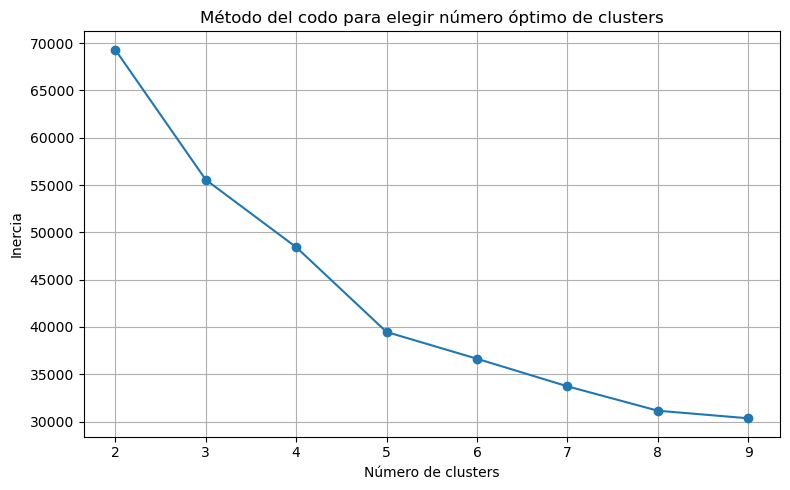

Distribución de clusters:
cluster
0    4826
1    1574
2     256
Name: count, dtype: int64

Promedio por cluster:
         tasa_paro  tasa_empleo  tasa_actividad  ipc_general  \
cluster                                                        
0        12.732876    49.027447       56.149146     0.470939   
1        20.544206    46.375362       58.341868     0.510798   
2        11.059531    55.383594       62.268750     0.407666   

         total_inmigrantes       gini    p80p20  Total poblacion  \
cluster                                                            
0             47350.625570  30.241464  2.550400     5.289877e+05   
1            149409.507624  34.294761  3.024753     1.217934e+06   
2            784733.984375  33.806793  2.863139     6.201306e+06   

         homicidios_consumados  homicidios_tentativa      drogas    lesiones  \
cluster                                                                        
0                     0.716317              2.261341   32.416385 

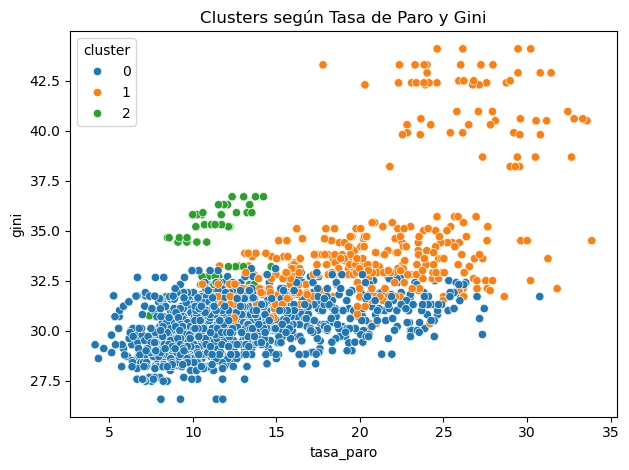

In [ ]:
# Convertir a numérico (por si hay strings erróneos)
for col in features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Ajustar lista a columnas realmente presentes
features = [col for col in features if col in df.columns]

# Rellenar NaNs con la media
df_clust = df[features].copy().fillna(df[features].mean())

# Eliminar filas con NaNs restantes
df_clust = df_clust.dropna()

# Validar que hay datos
if df_clust.empty:
    raise ValueError("No hay suficientes datos tras limpiar para entrenar el modelo.")

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)

# Método del codo
inertia = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title("Método del codo para elegir número óptimo de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar clustering (elige K manualmente)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Resultados
print("Distribución de clusters:")
print(df["cluster"].value_counts())

print("\nPromedio por cluster:")
print(df.groupby("cluster")[features].mean())

# Visualización
sns.scatterplot(data=df, x="tasa_paro", y="gini", hue="cluster", palette="tab10")
plt.title("Clusters según Tasa de Paro y Gini")
plt.tight_layout()
plt.show()

# Guardar resultado
df.to_csv("Resultados_Clustering.csv", index=False)